# 1) Exploring Dataset

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import missingno
import re
from src.funciones import *

### Read Dataset

In [2]:
df = pd.read_csv('../datasets/attacks.csv', encoding='latin-1')

### Initial View of Dataset

In [3]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
df.shape

(25723, 24)

In [5]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

# 2) Criteria of analysis

I would like to analyse the following information from the dataset:

- In which **month frame** are there more **shark attacks** per **country**?
- At what **time of the day** are there more **shark attacks** per **country**?
- Which **activity** provokes more **fatal injuries** per **country**?

# 3) Cleaning data according to criteria

### 1) Choosing meaningful columns

The following columns contain information that can help to answer the questions under analysis: 

In [6]:
columns=['Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Fatal (Y/N)', 'Time']

In [7]:
df=df[columns]

In [8]:
df.head()

,Date,Year,Type,Country,Area,Location,Activity,Fatal (Y/N),Time
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,N,18h00
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,N,14h00 -15h00
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,N,07h45
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,N,NaN
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,N,NaN


### 2) Dropping duplicates

Dropping duplicates in the beginning of the cleaning process can save lot of time and effort. 

In [9]:
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f'Number of duplicate records dropped: {before - after}')

Number of duplicate records dropped: 19467


In [10]:
df.shape

(6256, 9)

### 3) Correcting data types

The datatype of the column `Year` is `float`. It seems highly recommendable to transform the data type of this column to `int` if a categorization of years in decades is later done.

In [11]:
df.dtypes

Date            object
Year           float64
Type            object
Country         object
Area            object
Location        object
Activity        object
Fatal (Y/N)     object
Time            object
dtype: object

In [12]:
df['Year'].fillna(0, inplace=True)
df['Year']=df['Year'].astype(np.int64)

In [13]:
df.dtypes

Date           object
Year            int64
Type           object
Country        object
Area           object
Location       object
Activity       object
Fatal (Y/N)    object
Time           object
dtype: object

### 4) Dropping Null Values

Figuring out the number of nulls in each row and columns can be useful to reduce the size of the data set and leave just those rows/columns with enough valuable info. 

#### COLUMNS

The number of nulls in each column is provided below (Absolute Frequency):

In [14]:
df.isnull().sum(axis=0)

Date              1
Year              0
Type              5
Country          50
Area            451
Location        532
Activity        541
Fatal (Y/N)     539
Time           3319
dtype: int64

Now let's see the percentage of nulls in each colum (Relative Frequency):

In [15]:
# len(df) is the total number of rows 
df.isnull().sum(axis=0) / len(df) * 100

Date            0.015985
Year            0.000000
Type            0.079923
Country         0.799233
Area            7.209079
Location        8.503836
Activity        8.647698
Fatal (Y/N)     8.615729
Time           53.053069
dtype: float64

Missingno library offers a very nice way to visualize the distribution of NaN values. In the graph, each column represents a dataframe column. The smaller the bar the more null values in the column.

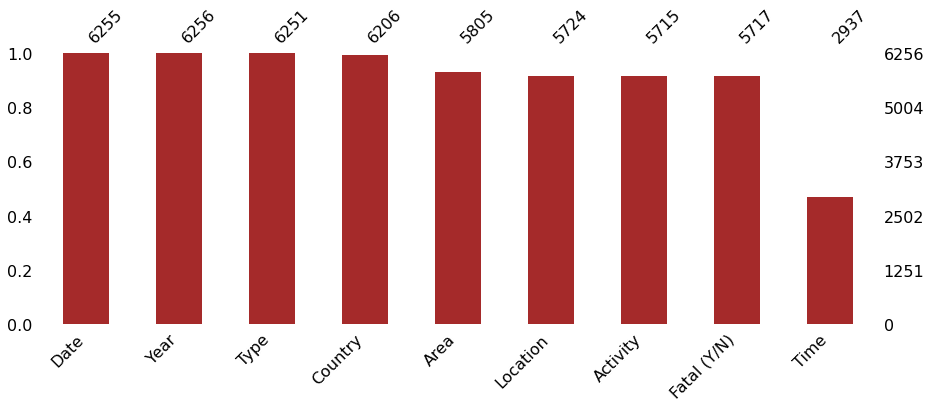

In [16]:
%matplotlib inline
missingno.bar(df, figsize=(15, 5), color='brown');

As can ben seen from the graph, the column `Time` presents the highest number of nulls. Nevertheless, it seems interesting to keep this colum to figure out at what time of the day there are more shark attacks per country.

#### ROWS

The number of nulls in each row is provided below (Absolute Frequency):

In [17]:
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       1
4       1
       ..
6298    2
6299    1
6300    3
6301    1
6302    8
Length: 6256, dtype: int64

Now let's see the percentage of nulls in each row (Relative Frequency):

In [18]:
df.isnull().sum(axis=1) / df.shape[1] * 100

0        0.000000
1        0.000000
2        0.000000
3       11.111111
4       11.111111
          ...    
6298    22.222222
6299    11.111111
6300    33.333333
6301    11.111111
6302    88.888889
Length: 6256, dtype: float64

As can ben seen from the output above, there are rows with a high % of nulls. The rows with more than 50% of nulls will be removed. 

In [19]:
before = len(df)
df = df[df.isnull().sum(axis=1) / df.shape[1] * 100 < 50]
after = len(df)
print(f'Number of rows dropped: {before - after}')

Number of rows dropped: 16


### 5) Cleaning Text 

It seems that there are few columns (`DATE`,`TIME` and `ACTIVITY`) in the dataset containing strings with lot of noise (i.e the valuable info is mixed with lot of unnecesary data). For this reason, RegEx will be used to clean these columns. 

It should be stressed that some functions were made to streamline the process. You can find these functions in the file `functions.py` in the folder `src`.

- Cleaning `DATE` column:

In [20]:
df["Date"].value_counts()

1957                    11
1942                     9
1956                     8
1950                     7
1958                     7
                        ..
04-Sep-1972              1
Aug-1953                 1
Reported 12-Sep-2014     1
12-Jan-2010              1
21-Sep-1994              1
Name: Date, Length: 5419, dtype: int64

In [21]:
dates=df["Date"].tolist()
dates_clean=pd.Series([clean_date(e) for e in dates])
#Nulls after cleaning
dates_clean_nulls=dates_clean.isnull().sum()
print("Number of null values in the column <Date> after cleaning: ",dates_clean_nulls)

Number of null values in the column <Date> after cleaning:  508


- Cleaning `TIME` column:

In [22]:
df["Time"].value_counts()

Afternoon               185
11h00                   127
Morning                 120
15h00                   108
12h00                   108
                       ... 
11h25                     1
14h34                     1
Shortly before 12h00      1
11h57                     1
Late night                1
Name: Time, Length: 366, dtype: int64

In [23]:
times=df["Time"].tolist()
times_clean=pd.Series([clean_time(e) for e in times])
#Nulls after cleaning
times_clean_nulls=times_clean.isnull().sum()
print("Number of null values in the column <Time> after cleaning: ", times_clean_nulls)

Number of null values in the column <Time> after cleaning:  3371


- Cleaning `ACTIVITY` column:

In [24]:
df["Activity"].value_counts()

Surfing                                     968
Swimming                                    855
Fishing                                     428
Spearfishing                                330
Bathing                                     160
                                           ... 
Surfing on "chest board" (boogie board?)      1
Freediving for seashells                      1
Swimming, after sailboat capsized             1
Swimming in the channel                       1
Dragging a shark                              1
Name: Activity, Length: 1532, dtype: int64

In [25]:
activities=df["Activity"].tolist()
activities_clean=pd.Series([clean_activity(e) for e in activities])
#Nulls after cleaning
activities_clean_nulls=activities_clean.isnull().sum()
print("Number of null values in the column <Activity> after cleaning: ", activities_clean_nulls)

Number of null values in the column <Activity> after cleaning:  1373


- Is the data clean `VALID`?

Let's do an overview of nulls values before and after the cleaning process:

- `DATE` column: they went from `0` to `508`.
- `TIME` column: they raised from `3303` to `3371`.
- `ACTIVITY`column: they went from from `527` to `1373`.

As can be observed, the increasing of null values regarding the total number of rows `6240` is not very representative. For this reason, it will be considered the text clening as acceptable.

- `UPDATING` dataframe:

In [26]:
df["Date"]=dates_clean
df["Time"]=times_clean
df["Activity"]=activities_clean
df=df.rename(columns={'Date': 'Month', "Fatal (Y/N)": "Fatal"})
df.head()

,Month,Year,Type,Country,Area,Location,Activity,Fatal,Time
0,Jun,2018,Boating,USA,California,"Oceanside, San Diego County",None,N,18h
1,Jun,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",standing,N,14h
2,Jun,2018,Invalid,USA,Hawaii,"Habush, Oahu",surfing,N,07h
3,Jun,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,surfing,N,None
4,Jun,2018,Provoked,MEXICO,Colima,La Ticla,free diving,N,None


### 6) Filling Null Values

To avoid future problems handling with data in PANDAS, the `NoneType` values will be replaced by the string: `unknown`.

In [27]:
df=df.fillna("unknown") 

In [28]:
df.isnull().sum(axis=0)

Month       0
Year        0
Type        0
Country     0
Area        0
Location    0
Activity    0
Fatal       0
Time        0
dtype: int64

### 7) Remap values in columns

Some data among the columns `Month`, `Time`, and `Activity` can be included under the same umbrella. In that way, binning the data, it will be easier to make further analysis later.

In [29]:
month_groups = {
                'Dec' : 'Dec-Feb', 'Jan' : 'Dec-Feb', 'Feb' : 'Dec-Feb',
                'Mar' : 'Mar-May', 'Apr' : 'Mar-May', 'May' : 'Mar-May',
                'Jun' : 'Jun-Aug', 'Jul' : 'Jun-Aug', 'Aug' : 'Jun-Aug',
                'Sep' : 'Sep-Nov', 'Oct' : 'Sep-Nov', 'Nov' : 'Sep-Nov', 
               } 

time_groups = {
               '07h' : '7-11','08h' : '7-11','09h' : '7-11','10h' : '7-11','11h' : '7-11', 'morning':'7-11', 'a.m':'7-11', 'am':'7-11',
               '12h' : '12-17','13h' : '12-17','14h' : '12-17','15h' : '12-17', '16h' : '12-17', '17h' : '12-17', 'afternoon' : '12-17', 'p.m' : '12-17', 'noon' : '12-17', 'pm' : '12-17',
               '18h' : '18-22','19h' : '18-22','20h' : '18-22','21h' : '18-22', '22h' : '18-22', 'evening':'18-22', 'dawn':'18-22',
               '23h' : 'low afluency','00h' : 'low afluency','01h' : 'low afluency','02h' : 'low afluency', 'night' : 'low afluency',
               '03h' : 'low afluency','04h' : 'low afluency','05h' : 'low afluency','06h' : 'low afluency'
              }

activity_groups = {
                  'shark fishing':'fishing', 
                  'swimming':'low water', 'bathing':'low water', 'floating':'low water', 'body boarding':'low water', 'body surfing':'low water', 'treading water':'low water', 'wading':'low water', 'standing':'low water', 'walking':'low water', 
                  'surfing':'sports table', 'surf skiing':'sports table', 'windsurfing':'sports table', 'boogie boarding':'sports table',
                  'rowing':'sports boat', 'kayaking':'sports boat', 'yachting':'sports boat', 'canoeing':'sports boat',
                  'diving':'underwater', 'scuba diving':'underwater', 'pearl diving':'underwater', 'free diving':'underwater','snorkeling':'underwater' 
                  }

In [30]:
df=df.replace({"Month": month_groups, "Time":time_groups, "Activity":activity_groups}) 

### 8) Categorize

As said in the `Correcting data types` section, the years will be binned in decades. The decades below 1880 will be grouped under the cathetory <0>, as they are not interesting for this analysis; It is more likely to have accurate data in the latest decades.

In [31]:
df["Year"] = pd.cut(df["Year"], bins=[1889,1899,1909,1919,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019], labels=range(1890,2020,10))

In [32]:
print("Nulls after caterogizing: ",df['Year'].isnull().sum())
df['Year'] = df['Year'].cat.add_categories(0)
df['Year'].fillna(0, inplace =True)
print("Nulls after adding new cathegory: ", df['Year'].isnull().sum())

Nulls after caterogizing:  575
Nulls after adding new cathegory:  0


In [33]:
sorted(list(df["Year"].value_counts().items()), key = lambda x: x[0], reverse=True)

[(2010, 1054),
 (2000, 1016),
 (1990, 565),
 (1980, 434),
 (1970, 320),
 (1960, 616),
 (1950, 461),
 (1940, 280),
 (1930, 272),
 (1920, 203),
 (1910, 147),
 (1900, 152),
 (1890, 145),
 (0, 575)]

### 9) Dropping duplicates (again)

After some data processing it is likely that some duplicates appear. For this reason, before generating the clean dataset, duplicates will be dropped again.

In [34]:
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f'Number of duplicate records dropped: {before - after}')

Number of duplicate records dropped: 110


In [35]:
df.shape

(6130, 9)

In [36]:
df=df.rename(columns={"Year": "Decade"})

### 10) Clean dataset

The clean dataset will be saved in the `output` folder for later analysis. 

In [37]:
df.head()

,Month,Decade,Type,Country,Area,Location,Activity,Fatal,Time
0,Jun-Aug,2010,Boating,USA,California,"Oceanside, San Diego County",unknown,N,18-22
1,Jun-Aug,2010,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",low water,N,12-17
2,Jun-Aug,2010,Invalid,USA,Hawaii,"Habush, Oahu",sports table,N,7-11
3,Jun-Aug,2010,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,sports table,N,unknown
4,Jun-Aug,2010,Provoked,MEXICO,Colima,La Ticla,underwater,N,unknown


In [38]:
df.to_csv("output/clean.csv")